Designing a **low-pass FIR filter** to remove high-frequency noise using **convolution** involves a structured theoretical and practical approach. Here's a complete breakdown with basic theory and implementation method:

---

## 🟩 🔷 THEORY

### 🔹 1. **What is an FIR Filter?**

A **Finite Impulse Response (FIR) filter** is a digital filter where the output depends only on current and past input values (not on past outputs).

### 🔹 2. **FIR Filter Equation**

$$
y[n] = \sum_{k=0}^{M-1} h[k] \cdot x[n-k]
$$

Where:

* $y[n]$: Output signal
* $x[n]$: Input signal
* $h[k]$: Filter coefficients (impulse response)
* $M$: Number of filter taps (order + 1)

This is essentially **convolution** of $x[n]$ and $h[n]$:

$$
y[n] = x[n] * h[n]
$$

---

## 🔷 3. **Low-Pass Filter Characteristics**

A **low-pass filter** allows low frequencies (e.g., <1 kHz) to pass and attenuates high frequencies (e.g., >2 kHz). Its ideal frequency response is:

$$
H_d(f) = 
\begin{cases}
1 & \text{for } |f| \leq f_c \\
0 & \text{for } |f| > f_c
\end{cases}
$$

But since we can’t realize this exactly in time-domain (requires infinite taps), we approximate it using **windowing method**.

---

## 🔷 4. **Design using Window Method**

### 🟢 Steps:

1. **Choose Cut-off Frequency** $f_c$ (normalized: $f_c / f_s$)
2. **Compute Ideal Impulse Response** $h_d[n]$:

$$
h_d[n] = 
\begin{cases}
2f_c & \text{if } n = M/2 \\
\frac{\sin(2\pi f_c (n - M/2))}{\pi (n - M/2)} & \text{otherwise}
\end{cases}
$$

This is a **sinc function** centered at $M/2$

3. **Apply Window Function** (e.g., Hamming):

$$
h[n] = h_d[n] \cdot w[n]
$$

This reduces ripples (Gibbs phenomenon).

---

## 🔷 5. **Convolution (Filtering)**

After obtaining $h[n]$, convolve it with the noisy signal $x[n]$ to get the filtered output $y[n]$:

$$
y[n] = \sum_{k=0}^{M-1} h[k] \cdot x[n - k]
$$

This operation removes high-frequency noise.

---




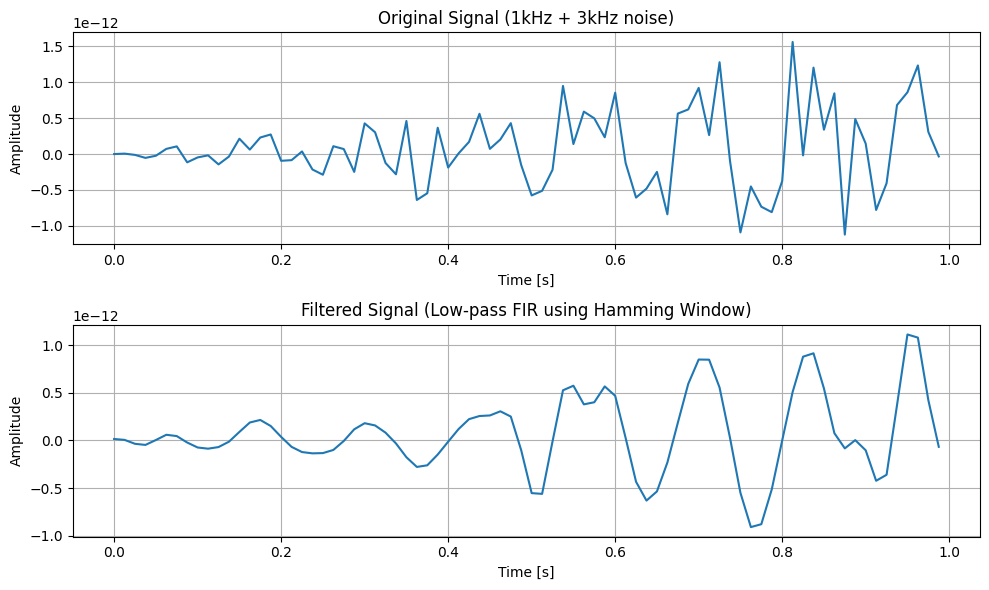

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Parameters
fs = 80        # Sampling frequency (Hz)
fc = 10        # Cutoff frequency (Hz)
M = 51           # Filter length (odd preferred)

# Time index for filter (0 to M-1)
n = np.arange(M)

# Normalized cutoff frequency (as a fraction of Nyquist rate)
fc_norm = fc / (fs / 2)  # Normalize by Nyquist rate (fs/2)

# Ideal LPF impulse response (sinc function centered at (M - 1)/2)
h_ideal = np.sinc(2 * fc_norm * (n - (M - 1) / 2))

# Apply Hamming window
window = np.hamming(M)
h = h_ideal * window

# Normalize the filter to ensure unity gain at DC
h = h / np.sum(h)

# Create a noisy signal: 1kHz signal + 3kHz noise
t = np.arange(0, 1.0, 1/fs)
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 3000 * t)

# Apply FIR filter using convolution
y = convolve(x, h, mode='same')

# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title("Original Signal (1kHz + 3kHz noise)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.title("Filtered Signal (Low-pass FIR using Hamming Window)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()



---

## 🟩 Summary Table

| Step                  | Description                                      |
| --------------------- | ------------------------------------------------ |
| **Input Signal**      | Contains both desired low-freq + high-freq noise |
| **FIR Filter Design** | Use sinc for ideal LPF, apply window             |
| **Window Function**   | Smooths transition band, reduces ripples         |
| **Convolution**       | Apply filter to signal using $y[n] = x[n]*h[n]$  |
| **Result**            | High-frequency noise removed                     |

---